In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_banknote_authentication.txt')

In [ ]:
df

,col1,col2,col3,col4,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Print class frequencies through pandas 
(Tenere presente che target = 1 vuol dire che il paziente ha il diabete, 0 che non lo ha)

In [ ]:
print(df.groupby('class').size())

class
0    762
1    610
dtype: int64


Bar plot for the target variable

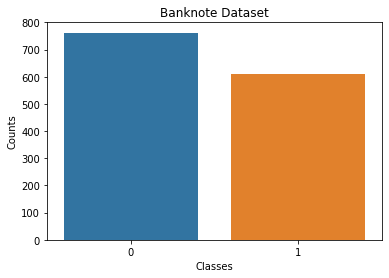

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="class", data=df)
plt.title("Banknote Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

Transform the dataframe into a numpy matrix (numpy is the python package for scientific computing)

In [ ]:
import numpy as np
df = df.to_numpy()
x=df[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({0.0: 762, 1.0: 610})

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]
 [ 4.3684   9.6718  -3.9606  -3.1625 ]
 [ 3.5912   3.0129   0.72888  0.56421]
 [ 2.0922  -6.81     8.4636  -0.60216]
 [ 3.2032   5.7588  -0.75345 -0.61251]
 [ 1.5356   9.1772  -2.2718  -0.73535]]
y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]
 [ 4.3684   9.6718  -3.9606  -3.1625 ]
 [ 3.5912   3.0129   0.72888  0.56421]
 [ 2.0922  -6.81     8.4636  -0.60216]
 [ 3.2032   5.7588  -0.75345 -0.61251]
 [ 1.5356   9.1772  -2.2718  -0.73535]]
y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((919, 4), (919,), (453, 4), (453,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[-1.3971    3.3191   -1.3927   -1.9948  ]
 [-1.7781    0.8546    7.1303    0.027572]
 [ 0.67886   4.1199   -4.569    -4.1414  ]
 [ 0.20216   1.9182   -3.2828   -0.61768 ]
 [-2.8267   -9.0407    9.0694   -0.98233 ]
 [-1.1497    1.2954    7.701     0.62627 ]
 [ 0.3798    0.7098    0.7572   -0.4444  ]
 [ 2.1464    6.0795   -0.5778   -2.2302  ]
 [ 4.1454    7.257    -1.9153   -0.86078 ]
 [ 4.3846   -4.8794    3.3662   -0.029324]]
y_train = [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=31) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


In [ ]:
#to be run only once, code for the installation of a new library
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


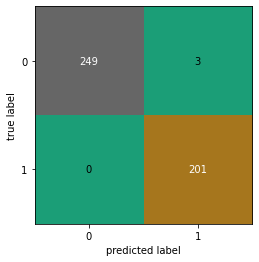

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

Adesso che abbiamo capito i vari indicatori, stampiamo il report dei vari indicatori:

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       252
         1.0       0.99      1.00      0.99       201

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



# Esercizio dTree

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_banknote_authentication.txt')

In [ ]:
import numpy as np

dfnp = df.to_numpy()
x=dfnp[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((919, 4), (919,), (453, 4), (453,))

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
dati reali presenti nel dataset di test = [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


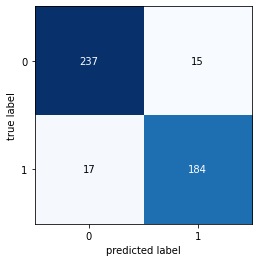

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       252
         1.0       0.92      0.92      0.92       201

    accuracy                           0.93       453
   macro avg       0.93      0.93      0.93       453
weighted avg       0.93      0.93      0.93       453



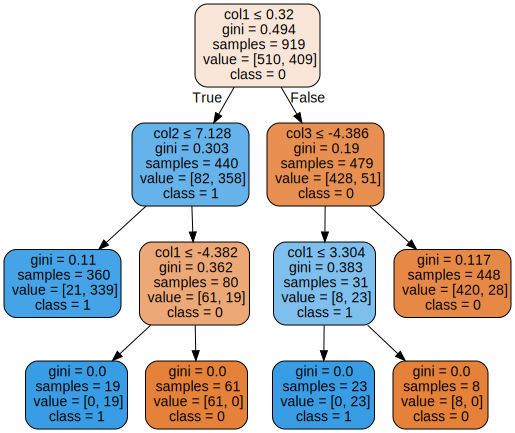

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph